# CSE 6240 Web Search and Text Mining
## Homework 1: Network analysis

This homework asks you to perform network analysis on a real world social network.

In [3]:
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from collections import Counter
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

Please run the following cell substituting your student and user names.

In [4]:
def author_honor_code (student_name='Jiarui Xu', user_name='Jiarui Xu'):
  print (f'I, {student_name} ({user_name}), state that I performed the tasks in this assignment following the Georgia Tech honor code(https://osi.gatech.edu/content/honor-code).')

# print the honor code before submission (substitute your name and username)
author_honor_code ()

I, Jiarui Xu (Jiarui Xu), state that I performed the tasks in this assignment following the Georgia Tech honor code(https://osi.gatech.edu/content/honor-code).


### Section 1: Setup and basics [2 point]

In this section, we load the network that we will use throughout this assignment. We will use a large social network from [GitHub](github.com). 
The following cell will download the network in your current directory. If it does not work, please download the zip file from [here](http://snap.stanford.edu/data/git_web_ml.zip) and unzip.

In [5]:
![ -d "git_web_ml" ] && rm -rf git_web_ml.zip && rm -rf git_web_ml
!wget http://snap.stanford.edu/data/git_web_ml.zip
!unzip git_web_ml.zip

--2022-01-17 19:10:14--  http://snap.stanford.edu/data/git_web_ml.zip
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396031 (2.3M) [application/zip]
Saving to: ‘git_web_ml.zip’

git_web_ml.zip      100%[===================>]   2.28M   581KB/s    in 4.0s    

2022-01-17 19:10:18 (581 KB/s) - ‘git_web_ml.zip’ saved [2396031/2396031]

Archive:  git_web_ml.zip
   creating: git_web_ml/
  inflating: git_web_ml/musae_git_edges.csv  
  inflating: git_web_ml/musae_git_features.json  
  inflating: git_web_ml/musae_git_target.csv  
  inflating: git_web_ml/citing.txt   
  inflating: git_web_ml/README.txt   


The GitHub network can be described as follows:

- A node in the network represents a developer account that is active.
- Two nodes are linked if they mutually follow each other.

There is other information related to the nodes in the data you just downloaded, but for the purpose of this assignment we will ignore it.

We'll now load the network using `networkx` from the file `git_web_ml/musae_git_edges.csv`

In [6]:
! head -n 5 git_web_ml/musae_git_edges.csv

id_1,id_2
0,23977
1,34526
1,2370
1,14683


#### 1.1 Write code to load the network from file [1.0 points]

In [7]:
def load_net (filename):
  """
  Arguments
  ---------
  filename (str): The name of the file which 
  contains the edges.

  Returns
  -------
  networkx.Graph
  """
  net = nx.Graph()
  with open (filename) as fin:
    for i, line in enumerate (fin):
      if i > 0:
        ## Add code below [1.0 points] ##
        indexcom=line.index(',')
        net.add_edge(line[:indexcom],line[indexcom+1:len(line)-1])
        #################################
  return net

In [10]:
net = load_net ('git_web_ml/musae_git_edges.csv')

####1.2 Calculate network properties [1.0 points]

Let's make sure the network is loaded correctly. Calculate the following statistics from the network. You may write your own code to calculate this yourself or use the `networkx` library.

- Number of nodes
- Number of edges
- Network density
- Transitivity
- Average clustering coefficient

**Sanity check!** The number of nodes and edges should be 37700 and 289003 respectively.

In [11]:
def print_network_statistics (net):
  """
  Arguments
  ---------
  net (networkx.Graph): The network whose 
  statistics are to be printed.

  Return
  ------
  None
  """
  nodes = None
  edges = None
  density = None
  transitivity = None
  average_clustering_coefficient = None
  ## Add code to compute the network statistics [1.0 points] ##
  nodes=len(list(net))
  edges=net.size()
  density=2*edges/(nodes*(nodes-1))
  transitivity=nx.transitivity(net)
  average_clustering_coefficient=nx.average_clustering(net)
  #############################################################
  print (f'=== Network statistics ===')

  print (f'Number of nodes: {nodes}')
  print (f'Number of edges: {edges}')
  print (f'Network density: {density:.4f}')
  print (f'Transitivity: {transitivity:.4f}')
  print (f'Average Clustering Coefficient: {average_clustering_coefficient:.4f}')
  print (f'======')

In [12]:
print_network_statistics (net)

=== Network statistics ===
Number of nodes: 37700
Number of edges: 289003
Network density: 0.0004
Transitivity: 0.0124
Average Clustering Coefficient: 0.1675


### Section 2 : Network structure properties [4 points]

Typically there are two ways to summarize networks: (a) using the statistical properties of the network, (b) by visualizing it's distributional properties.

In this section, we'll use the latter approach. We'll calculate and plot the degree distribution of the observed network. We'll then compare the network's degree distribution to that of "ideal" networks such as, erdos-renyi network, the small world network, and the albert-barabasi network.

Once again you'll use `networkx` and call functions from that library in this section.



#### 2.1 Write a function to get the degree of each node [0.8 points]

In [13]:
def get_degrees (net):
  """ Given a network, get the degree for every node in the network
  
  Arguments
  ---------
  net (networkx.Graph): The network for which the degree distribution is
      calculated.

  Returns
  -------
  degree_sequence (numpy.array): The degree distribution.
  """
  degree_sequence = None
  ## Add code below [0.8 points] ##
  degree_sequence = []
  for item in list(net.nodes):
    degree_sequence.append(net.degree(item))   
  degree_sequence.sort()
  ##################################
  return degree_sequence

#### 2.2 Finish the function to plot the degree distribution of a network [0.8 points] 

Plot both the degree and the counts on a log scale.

In [14]:
def plot_degree_distribution (net, color='r'):
  """ Plot the degree distribution on a log-log scale.
  On X-axis, plot the degree on a log scale
  On Y-axis, plot the number of nodes with the given degree on a log scale

  Arguments
  ---------
  net (networkx.Graph): The network for which the degree distribution is to 
  be plotted.

  Returns
  -------
  None

  Notes
  -----
  - Use the matplotlib's logllog function for ploting.
  - Use the input color, linestyle='None', marker='o', and markersize=2.0
    as additional arguments to the loglog function that will plot the degree distribution.
  """
  degree_sequence = get_degrees (net)
  ## Add code below [0.8 points] ##
  # Hint! you may want to use the Counter module here
  hist={}
  for d in degree_sequence:
    if d in hist:
      hist[d]+=1
    else:
      hist[d]=1
  xl=np.array(list(hist.keys()))
  yl=np.array(list(hist.values()))
  plt.loglog(xl,yl,color,marker='o',markersize=2.0,linestyle='None')
  ##################################
  plt.xlabel ('Degree')
  plt.ylabel ('Number of nodes with degree')
  plt.title ('Degree distribution on log-log scale')

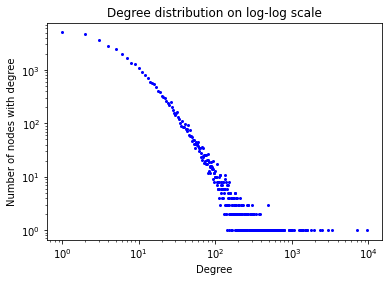

In [15]:
plot_degree_distribution (net, color='b')

#### 2.3 Compare the network properties and the degree distribution with random networks [2.4 point]  

Now let's compare this degree distribution with other ideal networks. We'll construct,

1. **Erdos-Renyi** random network: To simulate a network in which edges are formed randomly based with some probability. We simulate the network with probability of the edge equal to the density of the GitHub network.
2. **Watts-Strogatz** random network: To simulate a small world network by rewiring the edges. We choose the $k$ near neighbors equal to the average degree of the GitHub network and probability of rewiring as $0.5$.
3. **Barabasi-Albert** random network: To simulate a preferential attachment network. In the preferential attachment model, nodes tend to form links with other nodes that have high degree. You can read about preferential attachment in detail [here](http://networksciencebook.com/chapter/5). We use the same number of nodes and new nodes connecting to as many as the average degree calculated for the GitHub network (rounded at the nearest integer less than the value)


You'll use `networkx`'s functions to create these different ideal networks. 
 

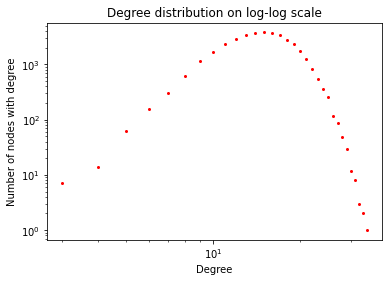

In [16]:
## Add code for erdos-renyi graph here [0.2 points] ##
# Hint! You may want the fast variant while generating these graphs
nodes=len(list(net))
edges=net.size()
er_net=nx.erdos_renyi_graph(nodes, 2*edges/(nodes*(nodes-1)))
######################################################
plot_degree_distribution (er_net, color='r')

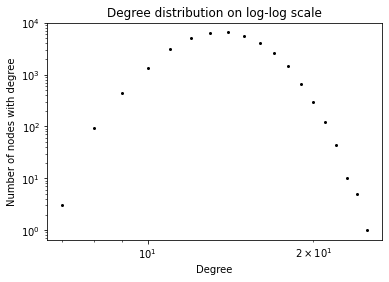

In [17]:
## Add code for watts-strogatz graph here [0.2 points] ##
nodes=len(list(net))
edges=net.size()
ws_net=nx.random_graphs.watts_strogatz_graph(nodes,int(2*edges/nodes),0.5)
#########################################################
plot_degree_distribution (ws_net, color='k')

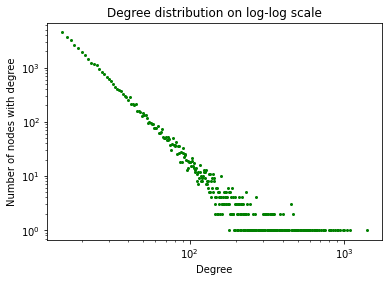

In [18]:
## Add code for barabasi-albert graph here [0.2 points] ##
nodes=len(list(net))
edges=net.size()
ba_net=nx.barabasi_albert_graph(nodes,int(2*edges/nodes))
##########################################################
plot_degree_distribution (ba_net, color='g')

For each of these randomly generated networks, print the same network statistics that we calculated [earlier](https://colab.research.google.com/drive/18UD3mMd9q5mrBbQDxmwgIOMSDAFuVJbH#scrollTo=tEGR8yzx7O3J&line=1&uniqifier=1) for the GitHub network.

In [19]:
print_network_statistics (er_net) # erdos-renyi graph
print_network_statistics (ws_net) # watts-strogatx graph
print_network_statistics (ba_net) # barabasi-albert graph

=== Network statistics ===
Number of nodes: 37700
Number of edges: 288296
Network density: 0.0004
Transitivity: 0.0004
Average Clustering Coefficient: 0.0004
=== Network statistics ===
Number of nodes: 37700
Number of edges: 263900
Network density: 0.0004
Transitivity: 0.0841
Average Clustering Coefficient: 0.0873
=== Network statistics ===
Number of nodes: 37700
Number of edges: 565275
Network density: 0.0008
Transitivity: 0.0047
Average Clustering Coefficient: 0.0051


Finally, we also plot the local clustering coefficient for each of these plots

In [20]:
def plot_loghist(x, bins):
  epsilon = 1e-6
  hist, bins = np.histogram(x, bins=bins)
  bins = bins + epsilon
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins, alpha=0.8)
  plt.xscale('log')

def plot_clustering_coeff (G):
  coeffs = None
  ## Add code to get the local clustering coefficient (0.4 points) ##
  coeffs=[]
  for item in list(G.nodes):
    coeffs.append(nx.clustering(G,item))
  ###################################################################
  plot_loghist (np.log10(np.array(coeffs) + 1), 10)

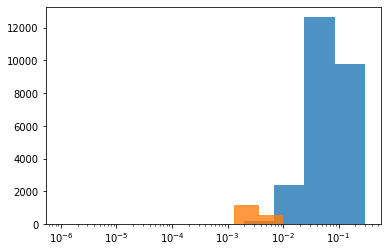

In [53]:
# plot the Github network and Erdos Renyi network
plot_clustering_coeff (net)
plot_clustering_coeff (er_net)

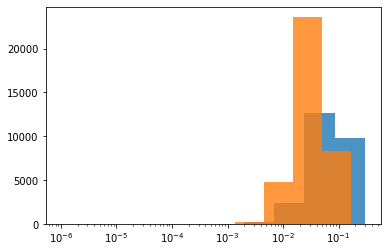

In [54]:
# plot the Github network and Watts Strogatz network
plot_clustering_coeff (net)
plot_clustering_coeff (ws_net)

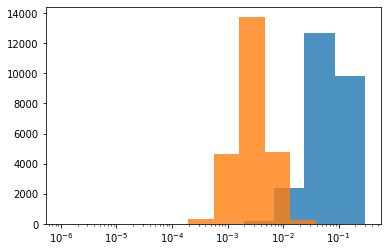

In [55]:
# plot the Github network and Barabasi Albert network
plot_clustering_coeff (net)
plot_clustering_coeff (ba_net)

Answer the following questions:

- Explain in a short paragraph the similarities and the differences between these randomized networks based on the network properties and the degree distribution [0.4 points]

Answer: 
First of all, the similarity of these three is that the network density of them are all very small, less than 0.001. In addition, few nodes' degree is higher than 150. The difference is that，with the same number of nodes，Barabasi-Albert random network have the highest number of edages, more than twice as much as the other two networks. Erdos-Renyi random network and Watts-Strogatz random network's number of edges is similar, but Erdos-Renyi random network is a little higher than Watts-Strogatz random network. For transitivity, Watts-Strogatz random network is much higher than the other two and Barabasi-Albert random network is time times higher than Erdos-Renyi random network. Therefore, we can see that Erdos-Renyi random network is the least likely to transmit between nodes. For clustering coefficient, Watts-Strogatz random network has the highest clustering coefficient and the second highest is Barabasi-Albert random network. We can infer from it that Watts-Strogatz random network is the most cohesive and transitive(highest diameter).

- Explain based on the degree distribution, network properties, and clustering distribution which ideal randomized network(s) closely resemble(s) the GitHub network [1.0 points]

Answer: I think BA(Barabasi-Albert) and WS(Watts-Strogatz) are similar to github network. In terms of statistic of the number degrees, BA(Barabasi-Albert)'s distribution is most similar to Github network, but its number of edges is larger and density is higher, so it is a little different from github network. From the perspective of transitivity and clustering coefficient, WS(Watts-Strogatz) and Github network have more similar clustering properties, but its degree distribution is different from github network.   Although according to the network's property, ER(Erdos-Renyi)'s number of edges is very similar to github network, its degree distribution, transitivity and clustering coefficient are much different from github network, so the property of ER is very different from github network. .  

### Section 3: Web Graph Connectivity [4 points]

Recall the Web graph’s Bowtie Structure shown in below Figure.

<img width="500" src='https://drive.google.com/uc?id=1TiHtmZn5oFM7NN_LVYKfBMQZFwSAmvaV' />

The web graph is directed and has three major components: $IN, SCC$, and $OUT$. The nodes in the Strongly Connected Component ($SCC$) can reach each other and can be reached from any node in $IN$. Nodes in the $SCC$ can reach any node in $OUT$.

\* For this question, we will ignore the presence of **TENDRILS**, **TUBES**, and
**DISCONNECTED** components.




Question:

- You randomly select two nodes $A$ and $B$ from the web graph.
What is the probability that you can follow outgoing edges starting from node $A$ to reach node $B$? Only consider the $IN$, $SCC$, and $OUT$ components of the graph. \\

 The size of $IN$, $SCC$, and $OUT$ components are represented as $|IN|$, $|SCC|$, $|OUT|$ respectively. Let the total number of nodes in the entire graph be $N (= |IN| + |SCC| + |OUT|)$. \\

 Assume the probability of a node in $IN$ reaching another node in $IN$ is $\alpha$. Similarly, the probability of a node in $OUT$ reaching another node in $OUT$ is $\beta$. 



Answer:
$P = (\alpha|IN|(|IN|-1) + |SCC|(|SCC|-1) + \beta|OUT|(|OUT|-1) + |IN||SCC| + |IN||OUT| + |SCC||OUT|)/(N(N-1))$

In [4]:
#assume alpha=0.5, beta=0.5
IN=44*1e6
SCC=56*1e6
OUT=44*1e6
alpha=0.5
beta=0.5
N=IN+SCC+OUT
Pro_IN=IN/N
Pro_IN2=(IN-1)/(N-1)
Pro_SCC=SCC/N
Pro_SCC2=(SCC-1)/(N-1)
Pro_OUT=OUT/N
Pro_OUT2=(OUT-1)/(N-1)
Pro=Pro_IN*Pro_IN2*alpha+Pro_IN*Pro_SCC*N/(N-1)+Pro_IN*Pro_OUT*N/(N-1)+Pro_SCC*Pro_IN*N/(N-1)*0+Pro_SCC*Pro_SCC2+Pro_SCC*Pro_OUT*N/(N-1)+Pro_OUT*Pro_IN*N/(N-1)*0+Pro_OUT+Pro_SCC*N/(N-1)*0+Pro_OUT*Pro_OUT2*beta
print(Pro)

0.8811728386809843
